<a href="https://colab.research.google.com/github/SanaAlotaibi/DataMiningProject/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/SanaAlotaibi/DataMiningProject.git

fatal: destination path 'DataMiningProject' already exists and is not an empty directory.


-loading data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = '/content/DataMiningProject/Dataset/Processed_dataset.csv'
data = pd.read_csv(file_path)



- Decision tree classification using Gini index

In [14]:
target_column = 'Stress_Level'
X = data.drop(columns=[target_column])
y = data[target_column]

split_sizes = [0.1, 0.2, 0.3]
gini_results = {}

for size in split_sizes:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)

    clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf_gini.fit(X_train, y_train)

    y_pred_gini = clf_gini.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_gini)
    gini_results[f"Train {int((1-size)*100)}% - Test {int(size*100)}%"] = accuracy

    print(f"\n Gini Index - Train {int((1-size)*100)}% / Test {int(size*100)}%")
    print(confusion_matrix(y_test, y_pred_gini))
    print(classification_report(y_test, y_pred_gini))

print("\n Gini Index Accuracy Results:")
for key, value in gini_results.items():
    print(f"{key}: {value:.3f}")


 Gini Index - Train 90% / Test 10%
[[38 40 35 28 48 45 35 35 47 43 33]
 [32 51 42 39 47 44 51 42 32 41 28]
 [29 57 50 33 50 55 47 47 50 46 39]
 [34 36 42 27 39 53 36 38 42 49 40]
 [36 38 36 42 48 37 35 42 48 47 44]
 [29 43 36 49 46 44 44 41 49 47 42]
 [49 38 36 43 38 50 26 38 44 34 33]
 [40 36 42 48 44 40 36 40 44 41 50]
 [52 38 30 42 51 41 41 43 42 44 38]
 [26 49 42 41 50 34 29 38 45 49 46]
 [44 44 35 35 44 46 49 31 43 42 48]]
              precision    recall  f1-score   support

           0       0.09      0.09      0.09       427
           1       0.11      0.11      0.11       449
           2       0.12      0.10      0.11       503
           3       0.06      0.06      0.06       436
           4       0.10      0.11      0.10       453
           5       0.09      0.09      0.09       470
           6       0.06      0.06      0.06       429
           7       0.09      0.09      0.09       461
           8       0.09      0.09      0.09       462
           9       0.10   

Accuracy Performance:  
When the dataset was divided into 90% for training and 10% for testing, the model achieved an accuracy of 9.26%. Under an 80% training and 20% testing split, the accuracy decreased to 8.72%. With a 70% training and 30% testing split, the accuracy improved slightly to 9.51%. While the accuracy values across all splits are relatively close to one another, the overall performance remains notably low.

Confusion Matrix Analysis:  
The confusion matrices reveal a high misclassification rate across all categories, indicating the model’s limited capability to differentiate between various stress levels. The significant overlap among classes suggests the model struggles to accurately categorize observations. Additionally, the precision and recall scores for each class are considerably low, reflecting poor predictive performance. Increasing the training data size does not yield any significant improvements, suggesting that either the features utilized are not sufficiently informative or that the model is not well-suited for this classification task.



In [13]:
entropy_results = {}

for size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
    clf_entropy.fit(X_train, y_train)

    y_pred_entropy = clf_entropy.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_entropy)
    entropy_results[f"Train {int((1-size)*100)}% - Test {int(size*100)}%"] = accuracy

    print(f"\n Entropy - Train {int((1-size)*100)}% / Test {int(size*100)}%")
    print(confusion_matrix(y_test, y_pred_entropy))
    print(classification_report(y_test, y_pred_entropy))

print("\n Entropy Accuracy Results:")
for key, value in entropy_results.items():
    print(f"{key}: {value:.3f}")


 Entropy - Train 90% / Test 10%
[[33 29 41 30 47 41 34 45 41 38 31]
 [31 36 42 47 36 50 41 49 34 44 52]
 [48 49 41 32 49 44 45 43 42 44 44]
 [42 61 45 40 35 53 32 33 45 41 47]
 [32 39 36 45 51 43 43 45 44 43 40]
 [46 39 42 37 34 42 44 31 55 37 40]
 [48 35 40 34 31 42 41 41 38 50 39]
 [43 42 36 39 44 49 31 31 37 41 45]
 [39 46 41 25 31 54 37 43 41 35 46]
 [46 36 48 49 45 41 38 43 42 33 45]
 [39 48 44 51 42 42 42 50 38 42 46]]
              precision    recall  f1-score   support

           0       0.07      0.08      0.08       410
           1       0.08      0.08      0.08       462
           2       0.09      0.09      0.09       481
           3       0.09      0.08      0.09       474
           4       0.11      0.11      0.11       461
           5       0.08      0.09      0.09       447
           6       0.10      0.09      0.09       439
           7       0.07      0.07      0.07       438
           8       0.09      0.09      0.09       438
           9       0.07      

<BarContainer object of 3 artists>

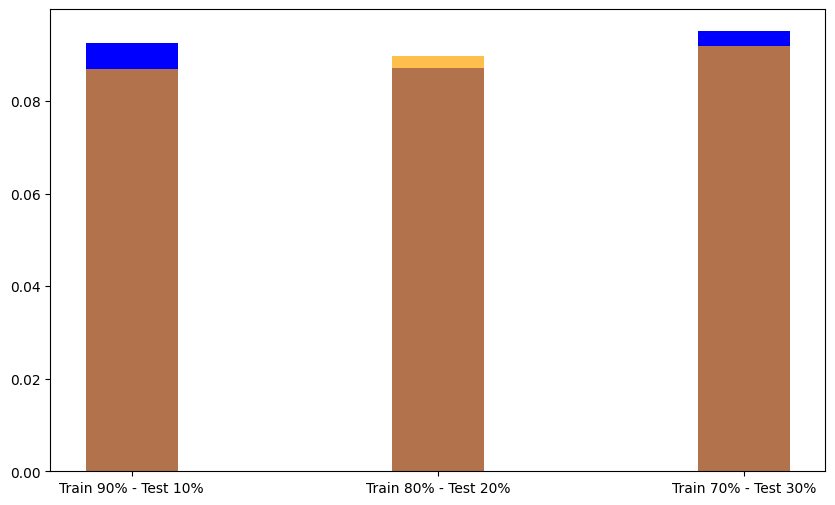

In [12]:
comparison_df = pd.DataFrame({
    'Data Split': list(gini_results.keys()),
    'Gini Accuracy': list(gini_results.values()),
    'Entropy Accuracy': list(entropy_results.values())
})

plt.figure(figsize=(10,6))
width = 0.3

plt.bar(comparison_df['Data Split'], comparison_df['Gini Accuracy'], width, label="Gini Index", color='blue')
plt.bar(comparison_df['Data Split'], comparison_df['Entropy Accuracy'], width, label="Entropy", color='orange', alpha=0.7)

In [16]:
!git add .
!git commit -m "Updated Processed_dataset.csv with new modifications"
!git push origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
